In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
#Running command to upload dataset 
from google.colab import files
uploaded =files.upload()

Saving train_0OECtn8.csv to train_0OECtn8 (1).csv


In [21]:
train_set=pd.read_csv('train_0OECtn8 (1).csv')

In [5]:
test_set=pd.read_csv('test_1zqHu22.csv')

In [22]:
train_set.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [23]:
train_set.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [24]:
train_set.head(1)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33


# Removing the ROW ID, VIDEO_ID AND AGE 

# Explanation
1.Row_id dosen't mean anything to us
2.Video_id also dosen't mean anything as a video is created a id is generated so the id dosen't specify or influence the user for getting engaged
3. AGE -As already the user profession specifies whether a user is a student , working profession or others so the profession already categorise the users so no need of user's age . *italicized text*

In [25]:
#Dropping the unnecessary columns from train_dtset
train_set=train_set.drop('row_id',axis=1)
train_set=train_set.drop('video_id',axis=1)
train_set=train_set.drop('age',axis=1)


In [26]:
train_set.head()

,user_id,category_id,gender,profession,followers,views,engagement_score
0,19990,37,Male,Student,180,1000,4.33
1,5304,32,Female,Student,330,714,1.79
2,1840,12,Male,Student,180,138,4.35
3,12597,23,Male,Student,220,613,3.77
4,13626,23,Male,Working Professional,220,613,3.13


In [27]:
#Importing the LabelEncoder from sklearn.preprocessing 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_set.gender=le.fit_transform(train_set.gender.values)

In [28]:
train_set.head(2)

,user_id,category_id,gender,profession,followers,views,engagement_score
0,19990,37,1,Student,180,1000,4.33
1,5304,32,0,Student,330,714,1.79


In [29]:
train_set.profession=le.fit_transform(train_set.profession.values)

In [30]:
train_set.head(2)

,user_id,category_id,gender,profession,followers,views,engagement_score
0,19990,37,1,1,180,1000,4.33
1,5304,32,0,1,330,714,1.79


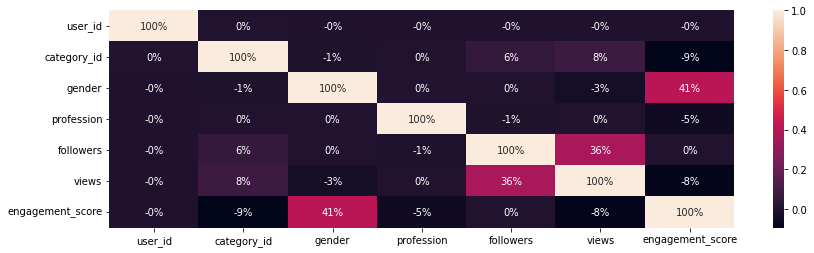

In [31]:
#Visualizing the correlation on heat map
plt.figure(figsize=(14,4))
sns.heatmap(train_set.corr(),annot=True,fmt='.0%')


Clearly it shows from correlation graph followers dosen't have any correlation with engagement_score so dropping the followers

In [32]:
train_set=train_set.drop('followers',axis=1)

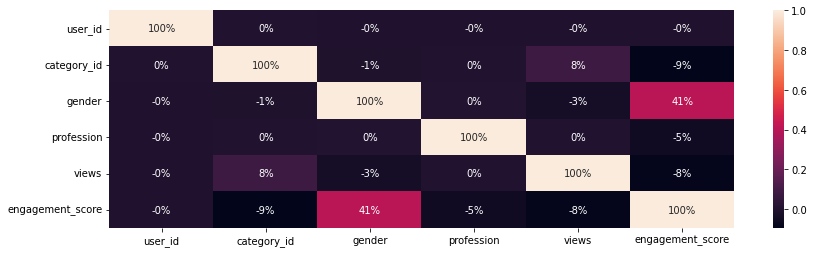

In [33]:
#Visualizing the correlation on heat map
plt.figure(figsize=(14,4))
sns.heatmap(train_set.corr(),annot=True,fmt='.0%')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


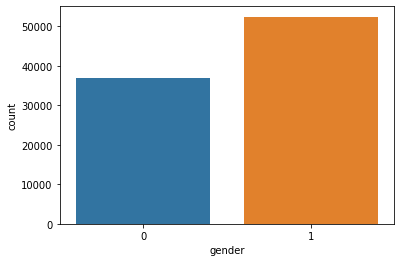

In [53]:
sns.countplot(train_set['gender'])

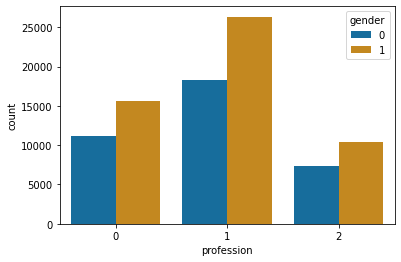

In [54]:
sns.countplot(x='profession',hue='gender',data=train_set,palette='colorblind')

In [39]:
train_set['Eng_Score']=train_set['engagement_score']

In [41]:
train_set=train_set.drop('Eng_Score',axis=1)

In [43]:
# shift column 'Name' to first position
first_column = train_set.pop('engagement_score')
  
# insert column using insert(position,column_name,
# first_column) function
train_set.insert(0, 'engagement_score', first_column)

In [44]:
train_set.head(2)

,engagement_score,user_id,category_id,gender,profession,views
0,4.33,19990,37,1,1,1000
1,1.79,5304,32,0,1,714


In [45]:
#Separating the X values which is independent variable and Y is dependent variable i.e Attrition
X_train=train_set.iloc[:, 1:train_set.shape[1]].values
Y_train=train_set.iloc[:, 0].values

In [46]:
X_train

array([[19990,    37,     1,     1,  1000],
       [ 5304,    32,     0,     1,   714],
       [ 1840,    12,     1,     1,   138],
       ...,
       [13655,    16,     1,     1,   462],
       [24840,     9,     1,     2,   819],
       [27183,    25,     1,     1,   317]])

In [47]:
Y_train

array([4.33, 1.79, 4.35, ..., 4.23, 3.77, 4.31])

In [55]:
#Implementing Linear Regression Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [56]:
model.fit(X_train,Y_train)

LinearRegression()

In [57]:
model.score(X_train,Y_train)

0.18202936675597847

In [70]:
test_set.head()

,user_id,category_id,gender,profession,views
0,7986,12,1,1,138
1,11278,34,1,1,840
2,17245,8,0,2,628
3,9851,16,1,1,462
4,16008,34,0,0,840


In [66]:
lf=LabelEncoder()

In [67]:
test_set.gender=lf.fit_transform(test_set.gender.values)


In [69]:
test_set.profession=le.fit_transform(test_set.profession.values)

In [59]:
train_set.head(1)

,engagement_score,user_id,category_id,gender,profession,views
0,4.33,19990,37,1,1,1000


In [60]:
#Dropping the unnecessary columns from train_dtset
test_set=test_set.drop('row_id',axis=1)
test_set=test_set.drop('video_id',axis=1)
test_set=test_set.drop('age',axis=1)

In [62]:
test_set=test_set.drop('followers',axis=1)

In [71]:
X_test=test_set

In [72]:
Y_test=model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [73]:
Y_test

array([3.89133944, 3.60674032, 3.03856234, ..., 3.80018556, 3.87668819,
       3.75335314])

In [74]:
Y_test_df = pd.DataFrame(Y_test, columns =['engagement_score'])

In [75]:
Y_test_df.head()

,engagement_score
0,3.891339
1,3.606740
2,3.038562
3,3.798951
4,2.957314


In [76]:
Y_test_df.to_csv(r'submi.csv')